In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data=pd.read_csv("C:\\Users\\anupa\\OneDrive - vit.ac.in\\Notebooks\\PROJECTS\\SET\\SURVEY ON INDIAN EDUCATION SYSTEM.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
# Create new pandas DataFrame.
df2 = df[["What are your short-term future career plans? "]]
df2.head()

,What are your short-term future career plans?
0,"After my PG, I want a satisfactory job, with d..."
1,Leading my team where i m working
2,MBA in IIM
3,"Get into a corporate for about a year or two, ..."
4,Surgeon


In [5]:
# Step 1: Cleaning the text
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2["What are your short-term future career plans? "].apply(clean)
print(df2['Cleaned Reviews'])

0      After my PG I want a satisfactory job with dec...
1                      Leading my team where i m working
2                                             MBA in IIM
3      Get into a corporate for about a year or two a...
4                                               Surgeon 
                             ...                        
141                               Practice architecture 
142                                             No plans
143                                                Money
144                         Get a job related to physics
145     Establish myself as a data science professional 
Name: Cleaned Reviews, Length: 146, dtype: object


<ipython-input-5-c16bc636fddb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cleaned Reviews'] = df2["What are your short-term future career plans? "].apply(clean)


In [6]:
# Step 2: Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
get_ipython().system('pip install -U textblob')

In [8]:
# POS tagger dictionary

from textblob import TextBlob

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

In [9]:
df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)
print(df2['POS tagged'])

def token_stop_pos(list1):
    tags=pos_tag(list1)
    newlist = []
    for word, tag in tags :
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)
print(df2['POS stopword'])

<ipython-input-9-43a10399ae26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)


0      [After, my, PG, I, want, a, satisfactory, job,...
1                 [Leading, my, team, where, i, m, work]
2                                         [MBA, in, IIM]
3      [Get, into, a, corporate, for, about, a, year,...
4                                              [Surgeon]
                             ...                        
141                             [Practice, architecture]
142                                           [No, plan]
143                                              [Money]
144                    [Get, a, job, relate, to, physic]
145    [Establish, myself, a, a, data, science, profe...
Name: POS tagged, Length: 146, dtype: object
0      [(PG, n), (want, v), (satisfactory, a), (job, ...
1                   [(Leading, v), (team, n), (work, n)]
2                                   [(MBA, n), (IIM, n)]
3      [(Get, n), (corporate, a), (year, n), (two, No...
4                                         [(Surgeon, n)]
                             ...           

<ipython-input-9-43a10399ae26>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)


In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df2['Lemma'] = df2['POS stopword'].apply(lemmatize)
df2.head()

<ipython-input-10-5fc106740a5a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lemma'] = df2['POS stopword'].apply(lemmatize)


,What are your short-term future career plans?,Cleaned Reviews,POS tagged,POS stopword,Lemma
0,"After my PG, I want a satisfactory job, with d...",After my PG I want a satisfactory job with dec...,"[After, my, PG, I, want, a, satisfactory, job,...","[(PG, n), (want, v), (satisfactory, a), (job, ...",PG want satisfactory job decent salary domain
1,Leading my team where i m working,Leading my team where i m working,"[Leading, my, team, where, i, m, work]","[(Leading, v), (team, n), (work, n)]",Leading team work
2,MBA in IIM,MBA in IIM,"[MBA, in, IIM]","[(MBA, n), (IIM, n)]",MBA IIM
3,"Get into a corporate for about a year or two, ...",Get into a corporate for about a year or two a...,"[Get, into, a, corporate, for, about, a, year,...","[(Get, n), (corporate, a), (year, n), (two, No...",Get corporate year two pursue high study
4,Surgeon,Surgeon,[Surgeon],"[(Surgeon, n)]",Surgeon


In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-11-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-11-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-11-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,What are your short-term future career plans?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"After my PG, I want a satisfactory job, with d...",After my PG I want a satisfactory job with dec...,"[After, my, PG, I, want, a, satisfactory, job,...","[(PG, n), (want, v), (satisfactory, a), (job, ...",PG want satisfactory job decent salary domain,0.666667,0.166667,Positive
1,Leading my team where i m working,Leading my team where i m working,"[Leading, my, team, where, i, m, work]","[(Leading, v), (team, n), (work, n)]",Leading team work,0.000000,0.000000,Neutral
2,MBA in IIM,MBA in IIM,"[MBA, in, IIM]","[(MBA, n), (IIM, n)]",MBA IIM,0.000000,0.000000,Neutral
3,"Get into a corporate for about a year or two, ...",Get into a corporate for about a year or two a...,"[Get, into, a, corporate, for, about, a, year,...","[(Get, n), (corporate, a), (year, n), (two, No...",Get corporate year two pursue high study,0.270000,0.080000,Positive
4,Surgeon,Surgeon,[Surgeon],"[(Surgeon, n)]",Surgeon,0.000000,0.000000,Neutral


In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-12-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-12-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-12-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,What are your short-term future career plans?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"After my PG, I want a satisfactory job, with d...",After my PG I want a satisfactory job with dec...,"[After, my, PG, I, want, a, satisfactory, job,...","[(PG, n), (want, v), (satisfactory, a), (job, ...",PG want satisfactory job decent salary domain,0.666667,0.166667,Positive
1,Leading my team where i m working,Leading my team where i m working,"[Leading, my, team, where, i, m, work]","[(Leading, v), (team, n), (work, n)]",Leading team work,0.000000,0.000000,Neutral
2,MBA in IIM,MBA in IIM,"[MBA, in, IIM]","[(MBA, n), (IIM, n)]",MBA IIM,0.000000,0.000000,Neutral
3,"Get into a corporate for about a year or two, ...",Get into a corporate for about a year or two a...,"[Get, into, a, corporate, for, about, a, year,...","[(Get, n), (corporate, a), (year, n), (two, No...",Get corporate year two pursue high study,0.270000,0.080000,Positive
4,Surgeon,Surgeon,[Surgeon],"[(Surgeon, n)]",Surgeon,0.000000,0.000000,Neutral


In [13]:
tb_counts=df2['TextBlob_Analysis'].value_counts()
print(tb_counts)

Neutral     95
Positive    46
Negative     5
Name: TextBlob_Analysis, dtype: int64


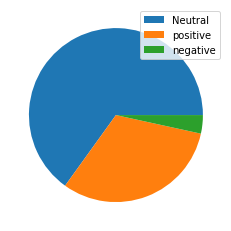

In [14]:
plt.pie(tb_counts)
plt.legend(['Neutral','positive','negative'])
plt.show()

In [15]:
df3=df2.copy()
print(df3.head())

      What are your short-term future career plans?   \
0  After my PG, I want a satisfactory job, with d...   
1                  Leading my team where i m working   
2                                         MBA in IIM   
3  Get into a corporate for about a year or two, ...   
4                                           Surgeon    

                                     Cleaned Reviews  \
0  After my PG I want a satisfactory job with dec...   
1                  Leading my team where i m working   
2                                         MBA in IIM   
3  Get into a corporate for about a year or two a...   
4                                           Surgeon    

                                          POS tagged  \
0  [After, my, PG, I, want, a, satisfactory, job,...   
1             [Leading, my, team, where, i, m, work]   
2                                     [MBA, in, IIM]   
3  [Get, into, a, corporate, for, about, a, year,...   
4                                          [Su

In [16]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df3['Vader Sentiment'] = df3["What are your short-term future career plans? "].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
df3['Vader Analysis'] = df3['Vader Sentiment'].apply(vader_analysis)
df3.head()

,What are your short-term future career plans?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Vader Sentiment,Vader Analysis
0,"After my PG, I want a satisfactory job, with d...",After my PG I want a satisfactory job with dec...,"[After, my, PG, I, want, a, satisfactory, job,...","[(PG, n), (want, v), (satisfactory, a), (job, ...",PG want satisfactory job decent salary domain,0.666667,0.166667,Positive,0.4215,Neutral
1,Leading my team where i m working,Leading my team where i m working,"[Leading, my, team, where, i, m, work]","[(Leading, v), (team, n), (work, n)]",Leading team work,0.000000,0.000000,Neutral,0.0000,Neutral
2,MBA in IIM,MBA in IIM,"[MBA, in, IIM]","[(MBA, n), (IIM, n)]",MBA IIM,0.000000,0.000000,Neutral,0.0000,Neutral
3,"Get into a corporate for about a year or two, ...",Get into a corporate for about a year or two a...,"[Get, into, a, corporate, for, about, a, year,...","[(Get, n), (corporate, a), (year, n), (two, No...",Get corporate year two pursue high study,0.270000,0.080000,Positive,0.0000,Neutral
4,Surgeon,Surgeon,[Surgeon],"[(Surgeon, n)]",Surgeon,0.000000,0.000000,Neutral,0.0000,Neutral


In [18]:
vader_counts = df3['Vader Analysis'].value_counts()
vader_counts

Neutral     134
Positive     12
Name: Vader Analysis, dtype: int64

In [19]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [20]:
df3['SWN analysis'] = df3['POS stopword'].apply(sentiwordnetanalysis)

0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.375 0.0 0.625
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.5 0.0 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.125 0.875
0.125 0.125 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.125 0.875
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
1.0 0.0 0.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.125 0.0 0.875
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.125 0.0 0.875
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.5 0.0 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1

In [21]:
swn_counts= df3['SWN analysis'].value_counts()
swn_counts

Neutral     98
Positive    43
Negative     4
Name: SWN analysis, dtype: int64

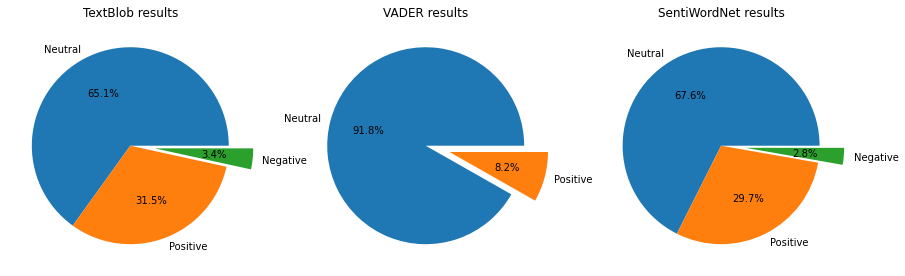

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()